In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 448 kB 30.5 MB/s 


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,189 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

In [3]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-09 06:01:29--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=GjXt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

plt.rc('font', family='Malgun Gothic')
train_df = pd.read_excel('/content/drive/MyDrive/sentiment_analysis.xlsx')
train_df.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,NaN,NaN
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,NaN,NaN
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,NaN,NaN


In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from konlpy.tag import Okt
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [7]:
train_df.fillna('', inplace = True)

In [8]:
train_df.drop(['번호', 'value' ,'연령', '성별', '상황키워드', '신체질환', '감정_소분류'],axis=1,inplace = True)

In [9]:
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 1, '당황' : 1, '슬픔' : 2, '상처' : 2}
train_df['label'] = train_df['감정_대분류'].map(sentimential_list)

텍스트 전처리 : text를 모든 문장을 합쳐서 처리



In [10]:
train_df['text'] = train_df['사람문장1'] + ' ' + train_df['시스템응답1']  + ' ' + train_df['사람문장2'].map(str) + ' ' + train_df['시스템응답2']  + ' ' +train_df['사람문장3']  + ' ' + train_df['시스템응답3']
train_df['text'] = train_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [11]:
train_df.drop_duplicates(subset = ['text'], inplace = True) #중복 제거

LSTM 딥러닝을 이용해서 예측하는 경우 -> 감정대분류를 label로 만든다.

In [12]:
x_data = train_df['text']
y_data = train_df['label']

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, stratify = y_data, random_state = 42)
X_train_data.shape, X_test_data.shape, y_train_data.shape, y_test_data.shape

((55768,), (18590,), (55768,), (18590,))

In [13]:
#불용어 처리
import pickle
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '것','적', '내', '때']

X_train = []
X_test = []
if not os.path.isfile('/content/drive/MyDrive/train2.pkl'):
  for sentence in tqdm(X_train_data):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)
  with open("/content/drive/MyDrive/train2.pkl","wb") as f:
    pickle.dump(X_train, f)
  for sentence in tqdm(X_test_data):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_test.append(stopwords_removed_sentence)
  with open("/content/drive/MyDrive/test2.pkl","wb") as f:
      pickle.dump(X_test, f)
else:
    with open("/content/drive/MyDrive/train2.pkl","rb") as f:
        X_train = pickle.load(f)
    with open("/content/drive/MyDrive/test2.pkl", "rb") as f:
        X_test = pickle.load(f)  

100%|██████████| 18590/18590 [05:27<00:00, 56.70it/s]


In [14]:
#텍스트를 벡터화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
threshold = 5
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17273
등장 빈도가 4번 이하인 희귀 단어의 수: 8766
단어 집합에서 희귀 단어의 비율: 50.74972500434204
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.635130553948363


In [16]:
vocab_size = total_cnt - rare_cnt + 1

In [17]:
#텍스트 -> 다시 시퀀스화
total_cnt = vocab_size
tokenizer = Tokenizer(total_cnt)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [19]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 70
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 94.92540525032277


In [20]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [21]:
encoder = LabelEncoder()
encoder.fit(y_train_data)
y_train = encoder.transform(y_train_data)
y_train = to_categorical(y_train)

encoder = LabelEncoder()
encoder.fit(y_test_data)
y_test = encoder.transform(y_test_data)
y_test = to_categorical(y_test)

In [22]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 70
hidden_units = 64
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(num_classes, activation='softmax'))
chkpoint_filepath = "/content/drive/MyDrive/signothing.h5"

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 3)
mc = ModelCheckpoint(filepath = chkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, callbacks=[es, mc], batch_size=32, validation_split=0.25, verbose = 1)

Epoch 1/50
1308/1308 [==============================] - ETA: 0s - loss: 0.6268 - accuracy: 0.7152
Epoch 1: val_accuracy improved from -inf to 0.79881, saving model to /content/drive/MyDrive/signothing.h5
1308/1308 [==============================] - 172s 128ms/step - loss: 0.6268 - accuracy: 0.7152 - val_loss: 0.4891 - val_accuracy: 0.7988
Epoch 2/50
1308/1308 [==============================] - ETA: 0s - loss: 0.4454 - accuracy: 0.8209
Epoch 2: val_accuracy improved from 0.79881 to 0.80182, saving model to /content/drive/MyDrive/signothing.h5
1308/1308 [==============================] - 169s 129ms/step - loss: 0.4454 - accuracy: 0.8209 - val_loss: 0.4829 - val_accuracy: 0.8018
Epoch 3/50
1308/1308 [==============================] - ETA: 0s - loss: 0.4004 - accuracy: 0.8418
Epoch 3: val_accuracy did not improve from 0.80182
1308/1308 [==============================] - 166s 127ms/step - loss: 0.4004 - accuracy: 0.8418 - val_loss: 0.4974 - val_accuracy: 0.7987
Epoch 4/50
1308/1308 [=======

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


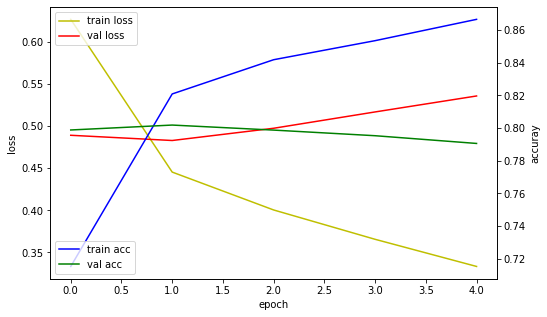

In [23]:
fig, loss_ax = plt.subplots(figsize=(8, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()